In [87]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd


# Scenario 1: ADM1, January 2017 
### Simulation ran at administrative level 3 (272 units)
### Simulation started with  2 048 183 agents

<AxesSubplot:>

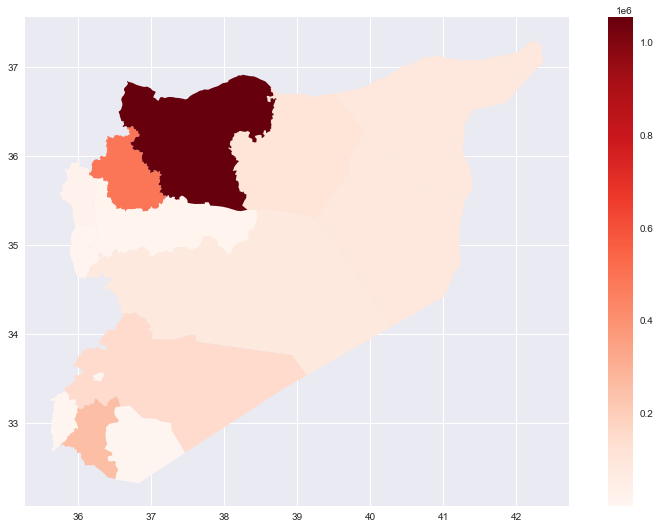

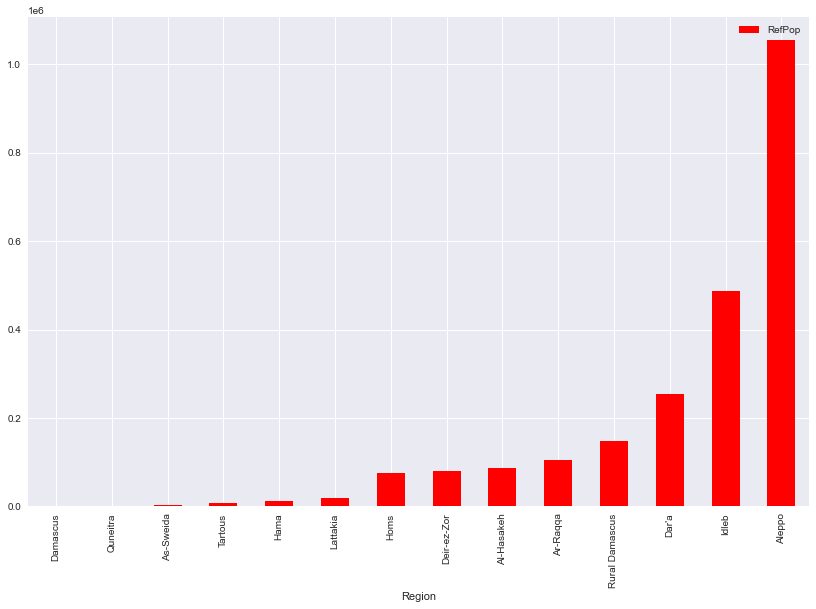

In [88]:
df2 = gpd.read_file('data/syria/syrian_districts_1.geojson')
df2.rename(columns = {'ADM1_EN':'Region'}, inplace = True)
df_refPop = pd.read_csv('data/syria/scenario/SyrRefPop_scen1_jan.csv')
df_merge_refPop  = df2.merge(df_refPop, on='Region', how='left')
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [14, 9]
fig, ax = plt.subplots()
df_merge_refPop = df_merge_refPop.sort_values('RefPop')
df_merge_refPop.plot.bar(x='Region', y='RefPop', color='red')
df_merge_refPop.plot(ax=ax, column='RefPop', cmap='Reds',legend=True)

<AxesSubplot:>

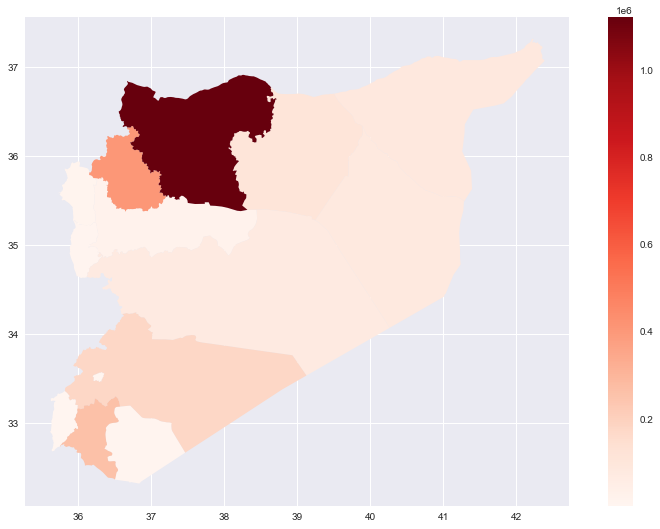

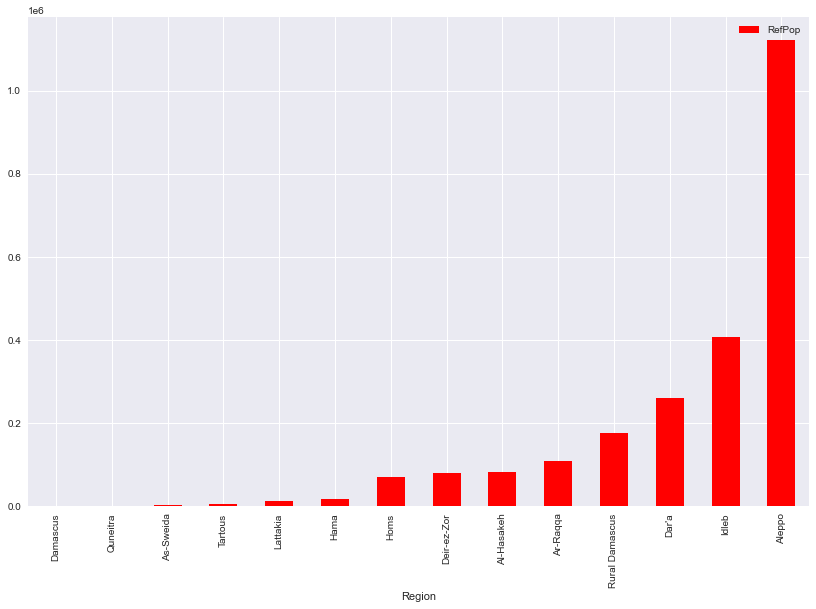

In [89]:
df2 = gpd.read_file('data/syria/syrian_districts_1.geojson')
df2.rename(columns = {'ADM1_EN':'Region'}, inplace = True)
df_refPop = pd.read_csv('data/syria/scenario/SyrRefPop_scen1_mar.csv')
df_merge_refPop  = df2.merge(df_refPop, on='Region', how='left')
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [14, 9]
fig, ax = plt.subplots()
df_merge_refPop = df_merge_refPop.sort_values('RefPop')
df_merge_refPop.plot.bar(x='Region', y='RefPop', color='red')
df_merge_refPop.plot(ax=ax, column='RefPop', cmap='Reds',legend=True)
#fig.savefig('scen1_mar.png')

# Analysis of scenario 2

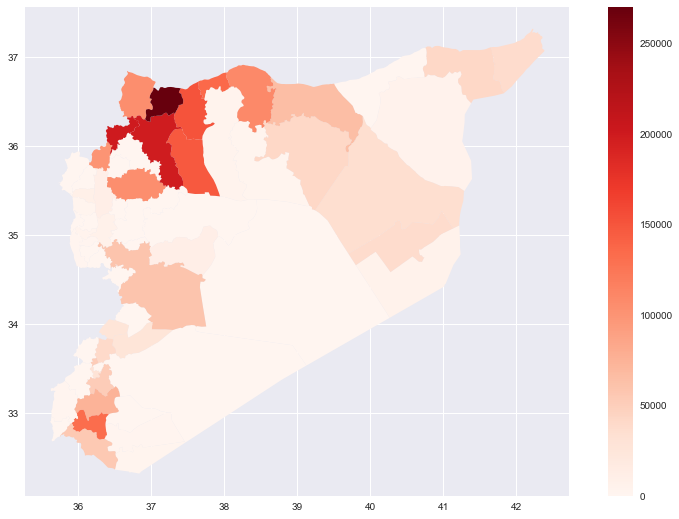

In [90]:
df2 = gpd.read_file('data/syria/syrian_districts_2.geojson')
df2.rename(columns = {'ADM2_EN':'Region'}, inplace = True)
df_refPop = pd.read_csv('data/syria/scenario/SyrRefPop_scen2_mar.csv')
df_merge_refPop  = df2.merge(df_refPop, on='Region', how='left')
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [14, 9]
fig, ax = plt.subplots()
df_merge_refPop = df_merge_refPop.sort_values('RefPop')
df_merge_refPop.plot(ax=ax, column='RefPop', cmap='Reds',legend=True)
fig.savefig('scen2_adm2.png')

# Analysis Scenario 3

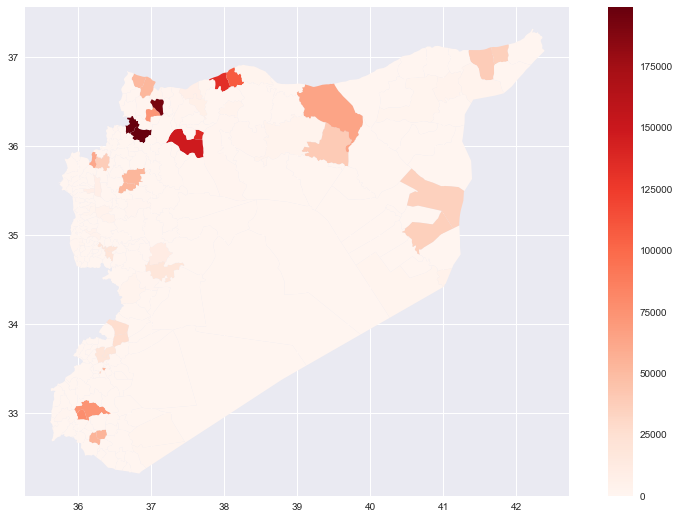

In [91]:
df2 = gpd.read_file('data/syria/syrian_districts_3.geojson')
df2.rename(columns = {'ADM3_EN':'Region'}, inplace = True)
df_refPop = pd.read_csv('data/SyrRefPop_scen3.csv')


#-----------------------------------------------------------
df_merge_refPop  = df2.merge(df_refPop, on='Region', how='left')

plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [14, 9]
fig, ax = plt.subplots()
df_merge_refPop.plot(ax=ax, column='RefPop', cmap='Reds',legend=True)
#df_merge_initPop.plot(ax=ax, column='InitPop', cmap='Greens',legend=True)
fig.savefig("scen3_adm3.png")

# Analysis Scenario 4
## prepare routes output of model:
## get routes fo most common destination from each origin

In [92]:
df_routes = pd.read_csv('data/syria/scenario/SyrRoutes.scen4_mar.csv')
df_routes = df_routes[df_routes.Number > 0]
df_routes = df_routes[df_routes['Origin'] != df_routes['Destination']]
top_20_routes = df_routes.loc[df_routes.groupby('Origin')['Number'].idxmax()]
top_20_routes

,Origin,Destination,Number
23,Al-Hasakeh,Ar-Raqqa,3461
44,Aleppo,Idleb,45942
32,Ar-Raqqa,Aleppo,40849
2,As-Sweida,Dar'a,8222
11,Damascus,Rural Damascus,30986
40,Dar'a,As-Sweida,68
13,Deir-ez-Zor,Ar-Raqqa,7853
17,Hama,Idleb,16706
25,Homs,Rural Damascus,14051
42,Idleb,Aleppo,154224



### A route consists of the origin location at the begining of the simulation and the location at the end of the simulation

### The green dot represents the origin location, the red dot represents the destiny location

C:\Users\vivia\AppData\Local\Temp\ipykernel_24104\2133929334.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  x_values_origins =  [df2.loc[df2['Region'] == i]['geometry'].centroid.x for i in top_20_routes.Origin]
C:\Users\vivia\AppData\Local\Temp\ipykernel_24104\2133929334.py:11: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  y_values_origins =  [df2.loc[df2['Region'] == i]['geometry'].centroid.y for i in top_20_routes.Origin]
C:\Users\vivia\AppData\Local\Temp\ipykernel_24104\2133929334.py:14: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  x_values_destinations =  [df2

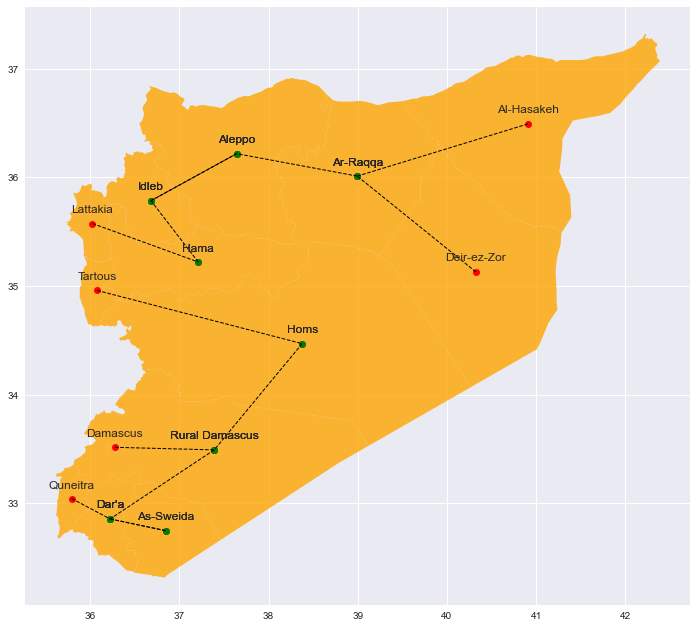

In [93]:
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [16, 11]
fig, ax = plt.subplots()
df2 = gpd.read_file('data/syria/syrian_districts_1.geojson')
df2.rename(columns = {'ADM1_EN':'Region'}, inplace = True)
df2.plot(ax=ax, color='orange', alpha=0.8)



x_values_origins =  [df2.loc[df2['Region'] == i]['geometry'].centroid.x for i in top_20_routes.Origin]
y_values_origins =  [df2.loc[df2['Region'] == i]['geometry'].centroid.y for i in top_20_routes.Origin]
names_origins = [i for i in top_20_routes.Origin]

x_values_destinations =  [df2.loc[df2['Region'] == i]['geometry'].centroid.x for i in top_20_routes.Destination]
y_values_destinations =  [df2.loc[df2['Region'] == i]['geometry'].centroid.y for i in top_20_routes.Destination]
names_destinations = [i for i in top_20_routes.Destination]

for i, j, l in zip(x_values_origins, y_values_origins, names_origins):
    ax.text(
       x=i,
       y=float(j) + 0.1,
       s=l,
       fontsize = 12,
       ha = "center",
       )
        
    ax.plot(
        i,
        j,
        marker = "o",
        c = "red",
        alpha = 1.0
        )


for i, j, l in zip(x_values_destinations, y_values_destinations, names_destinations):
    ax.text(
       x=i,
       y=float(j) + 0.1,
       s=l,
       fontsize = 12,
       ha = "center",
       )
        
    ax.plot(
        i,
        j,
        marker = "o",
        c = "green",
        alpha = 1.0
        )



for i, j, l, t in zip(x_values_origins, x_values_destinations, y_values_origins, y_values_destinations):
    plt.plot([i,j], [l,t], linewidth = 1, linestyle = "--", color = "black")


In [94]:
#fig.savefig("scen4_routes.png")